# Numerical solution of the wave equation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
a = 0
b = 1
c = 0
d = 1


def u(x, t):
    return np.cos(x * t)

def f(x, t):
    return (t ** 2 - x ** 2) * np.cos(x * t)

def u_x0(x):
    return 1

def du_x0(x):
    return 0

def u_t0(t):
    return 1

def du_t1(t):
    return -t * np.sin(t)

In [3]:
def plot_graphs(x, t, u, y):
    T, X = np.meshgrid(t, x)
    
    fig = plt.figure()
    plt.figure(figsize=(12, 8))
    
    ax = plt.axes(projection='3d')
    ax.contour3D(X, T, u, 250, cmap='Greens')
    ax.contour3D(X, T, y, linewidths=3, cmap='Oranges')
    ax.set_xlabel('x')
    ax.set_ylabel('t')
    ax.set_zlabel('u/y')
    plt.show()

### Explicit difference scheme

In [4]:
h = 0.1
tau = 0.1

In [5]:
def explicit_scheme(a, b, c, d, f, h, tau):
    N1 = round((b - a) / h)
    N2 = round((d - c) / tau)
    x = [h * i for i in range(N1 + 1)]
    t = [tau * j for j in range(N2 + 1)]
    y = np.zeros((N1 + 1, N2 + 1))
    for i in range(N1 + 1):
        y[i][0] = u_x0(x[i])
        y[i][1] = y[i][0] + tau ** 2 / 2 * f(x[i], 0)
    for j in range(1, N2):
        y[0][j + 1] = u_t0(t[j + 1])
        for i in range(1, N1):
            y[i][j + 1] = tau ** 2 * ((y[i + 1][j] - 2 * y[i][j] + y[i - 1][j]) / h ** 2 + f(x[i], t[j])) + 2 * y[i][j] - y[i][j - 1]
        y[N1][j + 1] = 2 * tau ** 2 / h * du_t1(t[j]) + tau ** 2 * f(x[N1], t[j]) + 2 * (1 - tau ** 2 / h ** 2) * y[N1][j] - y[N1][j - 1] + 2 * tau ** 2 / h ** 2 * y[N1 - 1][j]
    return x, t, y

In [6]:
x, t, y = explicit_scheme(a, b, c, d, f, h, tau) 

u_values = [[u(xi, ti) for ti in t] for xi in x]
print(np.abs(np.subtract(u_values, y)).max())

0.0003932078895427793


<Figure size 432x288 with 0 Axes>

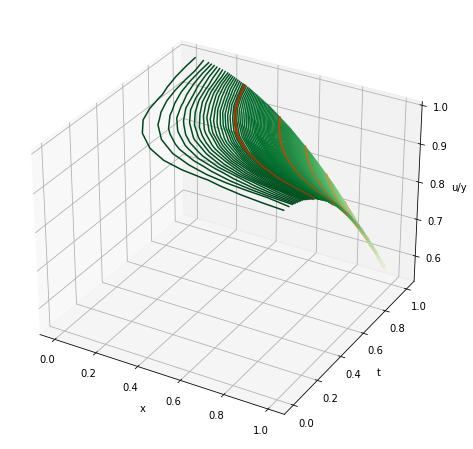

In [7]:
plot_graphs(x, t, u_values, y)

### Implicit difference scheme

In [8]:
h = 0.1
tau = 0.1

In [9]:
def sweep_method(a, c, b, f, N):
    alpha = [0] * (N + 1)
    beta = [0] * (N + 1)
    y = [0] * (N + 1) 
    alpha[1] = b[0] / c[0]
    beta[1] = f[0] / c[0]
    
    for i in range(1, N):
        alpha[i + 1] = b[i] / (c[i] - alpha[i] * a[i])
        beta[i + 1] = (f[i] + a[i] * beta[i]) / (c[i] - alpha[i] * a[i])
    
    y[N] = (f[N] + a[N] * beta[N]) / (c[N] - alpha[N] * a[N])
    for i in range(N - 1, -1, - 1):
        y[i] = alpha[i + 1] * y[i + 1] + beta[i + 1]
    
    return y


def implicit_scheme(a, b, c, d, f, h, tau):
    N1 = round((b - a) / h)
    N2 = round((d - c) / tau)
    x = [h * i for i in range(N1 + 1)]
    t = [tau * j for j in range(N2 + 1)]
    y = np.zeros((N1 + 1, N2 + 1))
    for i in range(N1 + 1):
        y[i][0] = u_x0(x[i])
        y[i][1] = y[i][0] + tau ** 2 / 2 * f(x[i], 0)
    for j in range(1, N2):
        a_sweep = [1 / (2 * h ** 2)] * (N1 + 1)
        b_sweep = [1 / (2 * h ** 2)] * (N1 + 1)
        c_sweep = [1 / tau ** 2 + 1 / h ** 2] * (N1 + 1)
        f_sweep = [0] * (N1 + 1)
        
        c_sweep[0] = 1
        b_sweep[0] = 0
        f_sweep[0] = u_t0(t[j + 1])
        a_sweep[N1] = 0
        c_sweep[N1] = 1
        f_sweep[N1] = 2 * tau ** 2 / h * du_t1(t[j]) + tau ** 2 * f(x[N1], t[j]) + 2 * (1 - tau ** 2 / h ** 2) * y[N1][j] - y[N1][j - 1] + 2 * tau ** 2 / h ** 2 * y[N1 - 1][j]
        
        for i in range(1, N1):
            f_sweep[i] = f(x[i], t[j]) + (y[i + 1][j - 1] - 2 * y[i][j - 1] + y[i - 1][j - 1]) / (2 * h ** 2) + (2 * y[i][j] - y[i][j - 1]) / tau ** 2

        y[:, j + 1] = sweep_method(a_sweep, c_sweep, b_sweep, f_sweep, N1)
    return x, t, y

In [10]:
x, t, y = implicit_scheme(a, b, c, d, f, h, tau)

u_values = [[u(xi, ti) for ti in t] for xi in x]
print(np.abs(np.subtract(u_values, y)).max())

0.0032035080575194552


<Figure size 432x288 with 0 Axes>

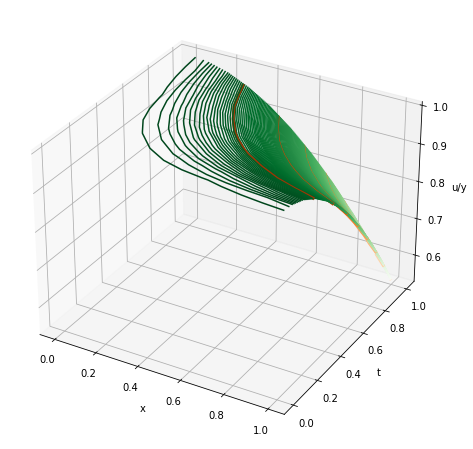

In [11]:
plot_graphs(x, t, u_values, y)